In [1]:
import os
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

# 8 Morphological Descriptors

## Read data

In [2]:
csv_path = "data/barley/extracted_phenotypes/area_morphology"

li = []
for i, file in enumerate([x for x in os.listdir(csv_path) if x.endswith(".csv")]):
    _df = pd.read_csv(os.path.join(csv_path,file), index_col=0)
    name = file.split(".")[0]
    _df.insert(loc=0,column="cultivar",value = name)
    _df.insert(loc=1,column="int_category",value = i)
    li.append(_df)

#create a dataframe from list
df1 = pd.concat(li, axis=0, ignore_index=True)

# retain only filtered values (i.e. removing non integral area such as awn containing, incomplete detection, partial appearance)
df1 = df1[df1["filter_level"] == 3]

# for easier interpretation of the dataframe
df1 = df1.sort_values('AS_seed_area')
df1.reset_index(drop=True, inplace=True)

In [3]:
df1.head()

,cultivar,int_category,file_name,image_frame,class_id,detection_score,filter_level,AS_seed_area,W_seed_width,L_seed_length,LWR_length_to_width_ratio,eccentricity,solidity,PL_perimeter_length,CS_seed circularity,"IS_intersection_of_length_and_width(y,x)","CG_center_of_gravity(y,x)",DS_distance_between_IS_andCG,roi
0,J647,16,17-18FND_J647-1-033.tif.jpg,3,1,0.999999,3,3908,47.578564,105.157859,2.210194,0.891790,0.976756,262.592929,0.712194,"(822.0, 914.5)","(821.089559877175, 916.2778915046059)",1.997448,[783 867 860 965]
1,J647,16,17-18FND_J647-1-033.tif.jpg,4,1,1.000000,3,3911,45.744163,109.237151,2.388002,0.908097,0.974340,271.178716,0.668323,"(209.0, 217.0)","(208.10380976732293, 217.19815903860905)",0.917837,[173 165 245 269]
2,J647,16,17-18FND_J647-1-033.tif.jpg,1,1,1.000000,3,4031,45.238439,113.727947,2.513967,0.917482,0.978398,274.735065,0.671111,"(1281.0, 1631.0)","(1281.515008682709, 1631.4522451004714)",0.685390,[1246 1577 1318 1687]
3,J647,16,17-18FND_J647-1-033.tif.jpg,2,1,1.000000,3,4132,45.728253,115.228237,2.519848,0.917884,0.977063,280.634560,0.659307,"(1254.5, 262.5)","(1255.9402226524685, 264.3344627299129)",2.332272,[1207 224 1306 307]
4,J647,16,17-18FND_J647-1-033.tif.jpg,3,1,1.000000,3,4156,46.749257,113.350881,2.424656,0.910989,0.980883,277.137085,0.679980,"(1118.0, 1048.5)","(1118.2678055822907, 1048.2574590952838)",0.361311,[1059 1023 1179 1078]


In [4]:
#the variable that will be used in are from column 7 to 15
df1.iloc[:,7:15].describe()

,AS_seed_area,W_seed_width,L_seed_length,LWR_length_to_width_ratio,eccentricity,solidity,PL_perimeter_length,CS_seed circularity
count,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000,4464.000000
mean,9509.239247,66.510776,182.217883,2.743111,0.925088,0.975423,444.987717,0.603350
std,2375.818616,6.793708,33.463303,0.449485,0.025069,0.004458,71.219335,0.061160
min,3908.000000,45.238439,105.157859,1.903889,0.850954,0.961128,262.592929,0.371328
25%,7679.000000,61.864098,156.578905,2.404091,0.909384,0.972757,392.508928,0.562157
50%,9366.000000,66.446181,181.721110,2.723772,0.930167,0.975878,445.099026,0.597684
75%,11052.000000,71.018737,205.164591,3.036285,0.944208,0.978644,493.204888,0.646232
max,19970.000000,93.216968,306.736184,4.700192,0.977105,0.986107,719.286363,0.760688


In [5]:
#define the color ordering in visualization
order = ['J647', 'C656', 'C346', 'N009', 'C319', 'K735', 'K692', 'J247', 'U353',
       'J064', 'T567', 'I622', 'I304', 'I335', 'U051', 'I626', 'B669', 'E245',
       'E612']

## Simple Visualization

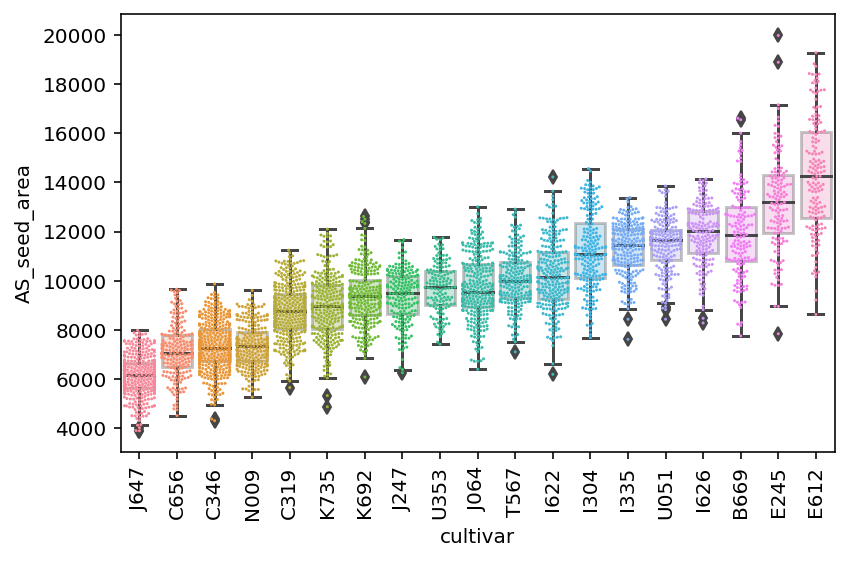

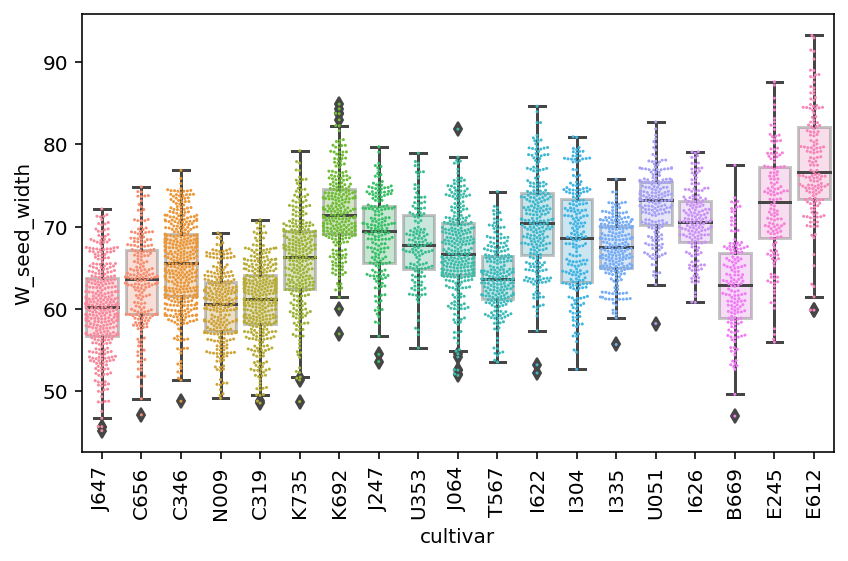

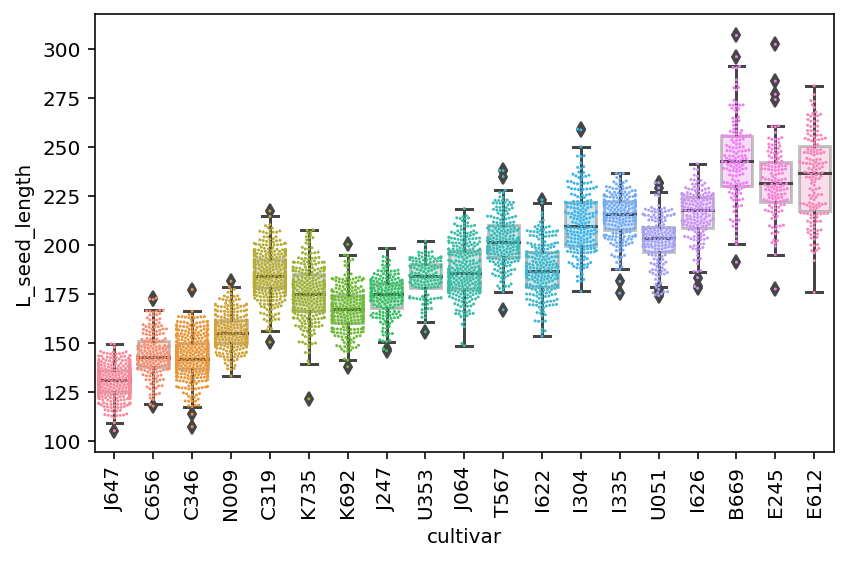

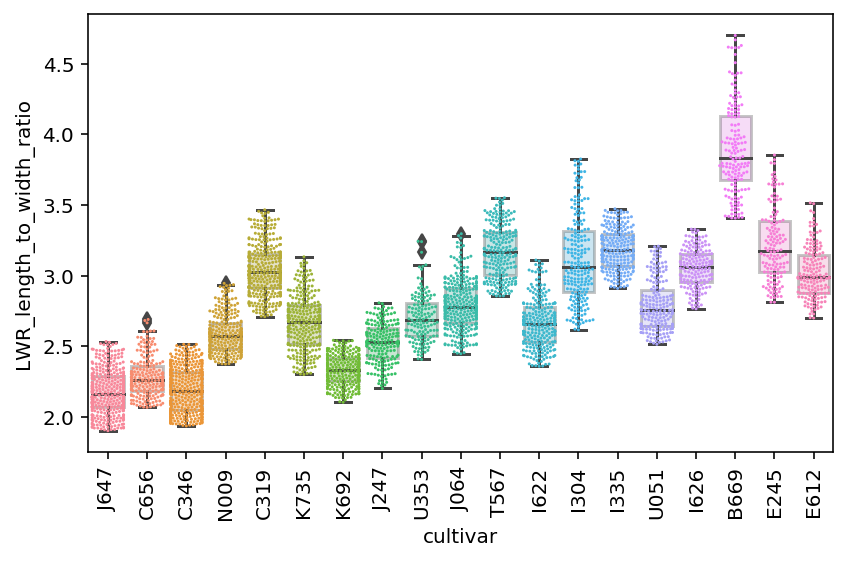

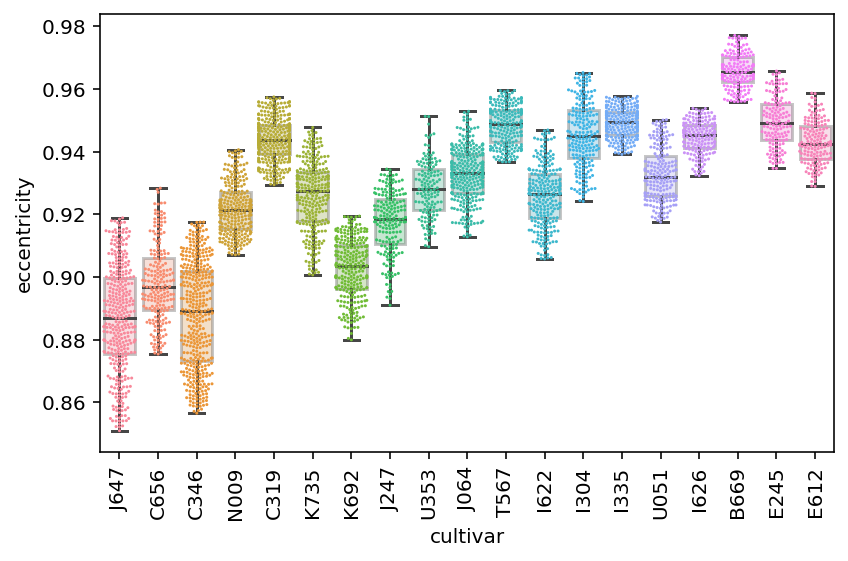

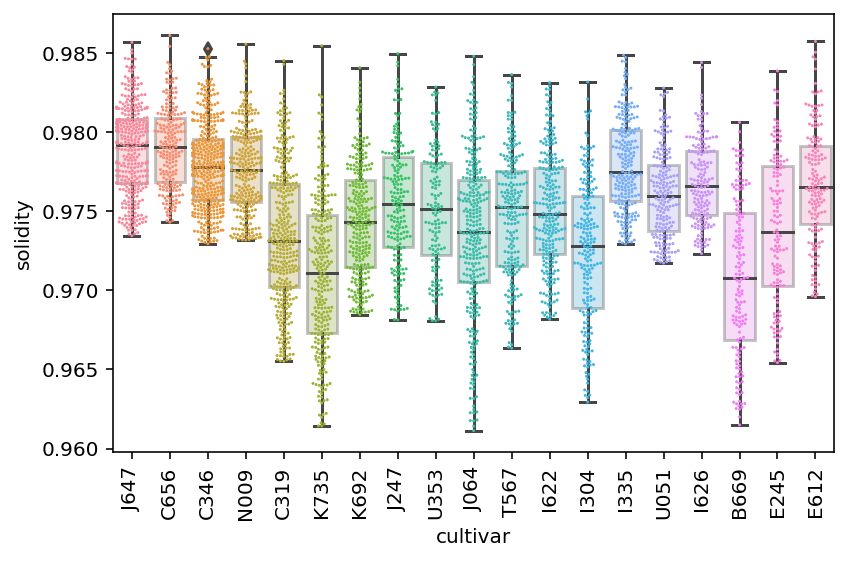

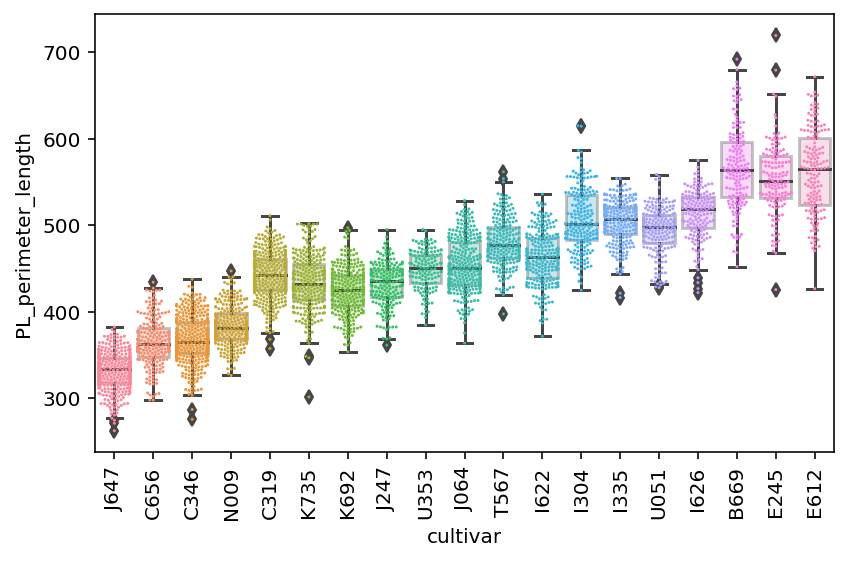

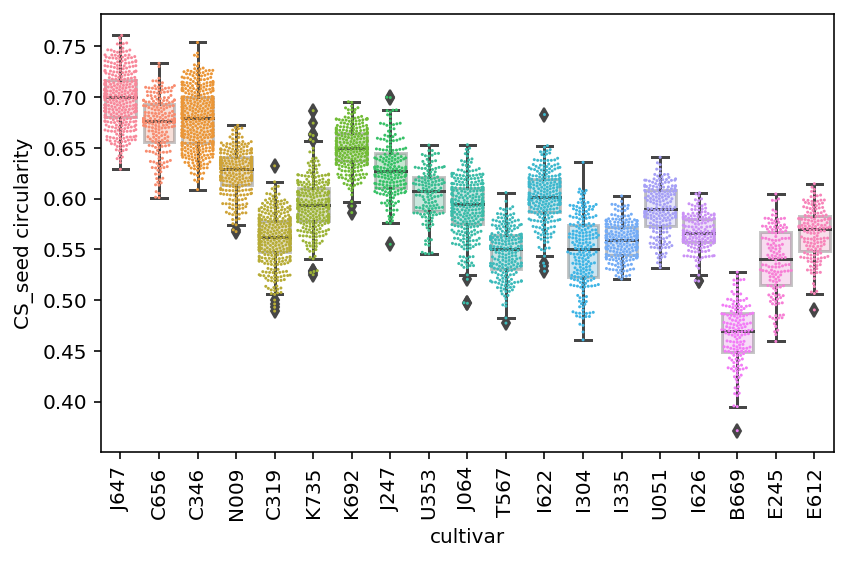

In [6]:
metrics = df1.iloc[:,7:15].columns
for i, metric in enumerate(metrics):
    #draw a boxplot
    g = sns.boxplot(y=metric,x="cultivar",data=df1, boxprops=dict(alpha=.3),order=order)
    g.set_xticklabels(g.get_xticklabels(),rotation=90,ha="center")
    
    #draw a swarmplot over the boxplot
    g = sns.swarmplot(y=metric,x="cultivar",data=df1,s=1.5,order=order)
    
    plt.tight_layout()
    plt.show()

## PCA

reuse the df1 variable above or read again with the below cell

In [7]:
csv_path = "data/barley/extracted_phenotypes/area_morphology"

li = []
for i, file in enumerate([x for x in os.listdir(csv_path) if x.endswith(".csv")]):
    _df = pd.read_csv(os.path.join(csv_path,file), index_col=0)
    name = file.split(".")[0]
    _df.insert(loc=0,column="cultivar",value = name)
    _df.insert(loc=1,column="int_category",value = i)
    li.append(_df)

#create a dataframe from list
df1 = pd.concat(li, axis=0, ignore_index=True)

# retain only filtered values (i.e. removing non integral area such as awn containing, incomplete detection, partial appearance)
df1 = df1[df1["filter_level"] == 3]

# for easier interpretation of the dataframe
df1 = df1.sort_values('AS_seed_area')
df1.reset_index(drop=True, inplace=True)

In [8]:
#normalize before PCA
_df1 = df1.iloc[:,7:15].apply(lambda x: (x-x.mean())/x.std(), axis=0)
#PCA
pca1 = PCA(n_components=None)
X = pca1.fit_transform(_df1)
embed1 = pd.DataFrame(X, columns=["PC{}".format(x + 1) for x in range(len(_df1.columns))])
embed1.index = _df1.index
embed1.insert(loc=0,column="cultivar",value = df1["cultivar"])
embed1

,cultivar,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,J647,-5.099238,2.244614,-0.238617,0.177729,-0.604154,0.340388,0.049381,0.016383
1,J647,-4.265465,3.056785,-0.027239,-0.062843,-0.439184,0.359211,0.121197,0.008858
2,J647,-4.093600,2.970194,-1.026682,-0.186426,-0.551398,0.244284,0.126477,0.040216
3,J647,-3.876460,3.035687,-0.745167,-0.185297,-0.442048,0.264436,0.131740,0.028708
4,J647,-4.352711,2.456338,-1.399487,-0.118799,-0.428613,0.265876,0.089542,0.034791
...,...,...,...,...,...,...,...,...,...
4459,E612,5.723368,-3.631933,-1.051938,0.302404,-0.000464,0.540022,0.102542,0.009471
4460,E612,4.391922,-4.774069,-0.219205,-0.036916,-0.409532,0.319980,0.297684,-0.014438
4461,E245,5.994576,-3.468105,-0.523133,0.340936,-0.037009,0.569616,0.093148,0.019525
4462,E612,4.495045,-5.173208,-0.427549,-0.048243,-0.320082,0.338756,0.326650,-0.020106


### Vanilla PCA Display

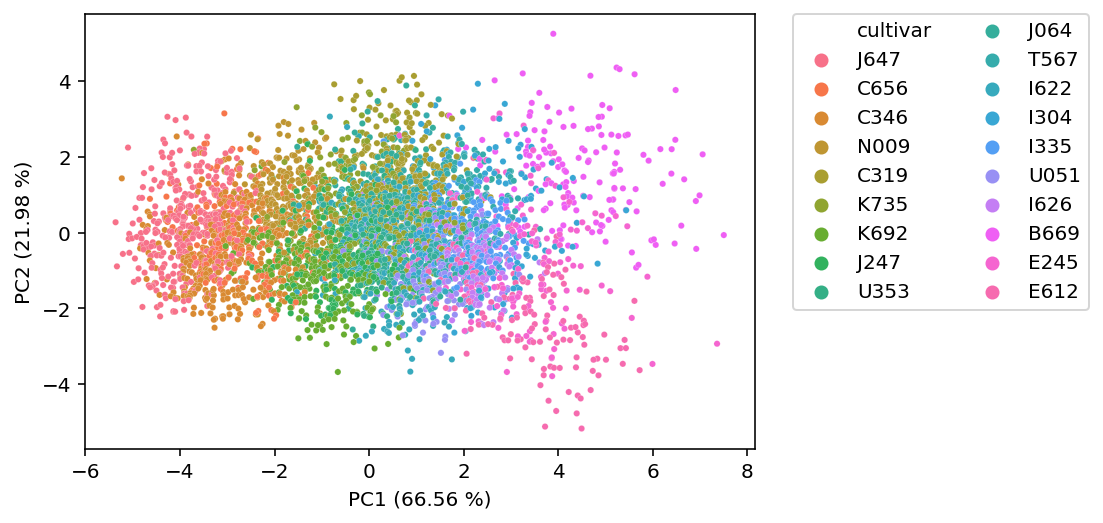

In [9]:
#plot PCA on PC1 and PC2
pc = 1
g = sns.scatterplot(x="PC"+str(pc), y="PC"+str(pc+1),
                data=embed1, hue="cultivar", alpha=1,linewidth=0.1,s=10,hue_order=order)

#add variance explained to axis
plt.xlabel("PC%s (%s %%)" %
           (str(pc), np.round(pca1.explained_variance_ratio_[pc-1]*100, 2)))
plt.ylabel("PC%s (%s %%)" % (
    str(pc+1), np.round(pca1.explained_variance_ratio_[pc]*100, 2)))


#add legend
g.legend(loc="upper right",bbox_to_anchor=(1.5,1),ncol=2, borderaxespad=0.)

### Overlay Average Coordinates

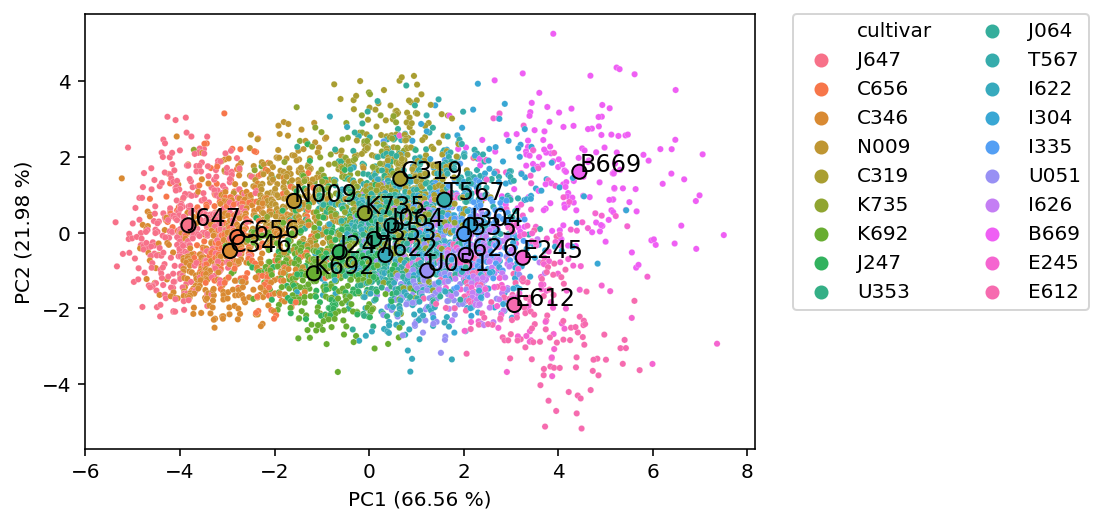

In [11]:
pc = 1
#calculate average of PCA coords
ave_embed1 = embed1.groupby("cultivar").mean()
ave_embed1["cultivar"] = ave_embed1.index


#plot PCA on PC1 and PC2
pc = 1
g = sns.scatterplot(x="PC"+str(pc), y="PC"+str(pc+1),
                data=embed1, hue="cultivar", alpha=1,linewidth=0.1,s=10,hue_order=order)

#plot average
g = sns.scatterplot(x="PC"+str(pc), y="PC"+str(pc+1),
                data=ave_embed1, alpha=1, edgecolor="black", linewidth=1,s=50,hue="cultivar",hue_order=order,legend=None)
#add cultivar name near average
for line in range(0,ave_embed1.shape[0]):
    textpos = [ave_embed1["PC"+str(pc)][line],ave_embed1["PC"+str(pc+1)][line]]
    plt.text(textpos[0], textpos[1],ave_embed1["cultivar"][line],size=12)


#add variance explained to axis
plt.xlabel("PC%s (%s %%)" %
           (str(pc), np.round(pca1.explained_variance_ratio_[pc-1]*100, 2)))
plt.ylabel("PC%s (%s %%)" % (
    str(pc+1), np.round(pca1.explained_variance_ratio_[pc]*100, 2)))
    
    
#add legend
g.legend(loc="upper right",bbox_to_anchor=(1.5,1),ncol=2, borderaxespad=0.)

### Overlay Eigenvector

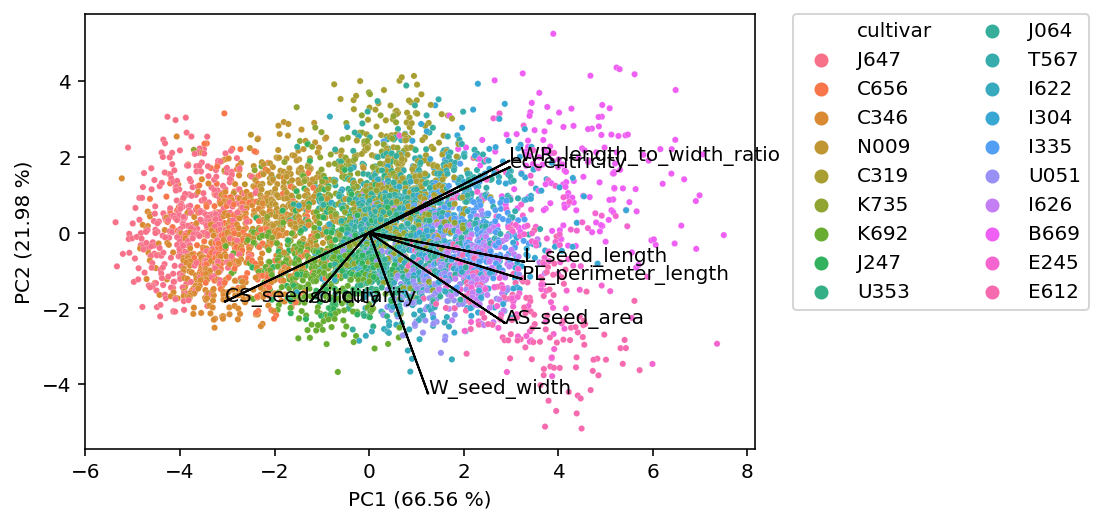

In [14]:
pc = 1

g = sns.scatterplot(x="PC"+str(pc), y="PC"+str(pc+1),
                data=embed1, hue="cultivar", alpha=1,linewidth=0.1,s=10,hue_order=order)
g.legend(loc="upper right",bbox_to_anchor=(1.5,1),ncol=2, borderaxespad=0.)

plt.xlabel("PC%s (%s %%)" %
           (str(pc), np.round(pca1.explained_variance_ratio_[pc-1]*100, 2)))
plt.ylabel("PC%s (%s %%)" % (
    str(pc+1), np.round(pca1.explained_variance_ratio_[pc]*100, 2)))
    

#eingenvector
xs = embed1.iloc[:, pc]
ys = embed1.iloc[:, pc+1]
coeff = 0.6 * np.transpose(pca1.components_[pc-1:pc-1+2, :])
n = coeff.shape[0]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())

for i, var in enumerate(list(_df1)):
    plt.arrow(0, 0, coeff[i, 0]/scalex, coeff[i, 1]/scaley, color="black")
    plt.text(coeff[i, 0]/scalex, coeff[i, 1]/scaley, var)

# Elliptic Fourier Descriptors

In [15]:
# install via "pip install pyefd" if not installed
from pyefd import *

In [16]:
#custom function to convert EFD from PC and other..
def pc2efv(pca, n, unit):
    vec = [0] * len(pca.explained_variance_)
    vec[n]= unit * np.sqrt(pca.explained_variance_[n])
    vec = np.dot(vec, pca.components_.T) + pca.mean_
    vvec = np.array([1,0,0])
    return np.concatenate([vvec,vec])
def pc2efm(res,n,unit):
    efm = pc2efv(res, n, -1*unit)
    efm = np.c_[efm,pc2efv(res,n,0)]
    efm = np.c_[efm,pc2efv(res,n,unit)]
    return efm.T

def get_value(pca,xi,yi):
    vec = [0] * len(pca.explained_variance_)
    vec[0] = xi
    vec[1] = yi
    vec = np.dot(vec, pca.components_.T) + pca.mean_
    vvec = np.array([1,0,0])
    return np.concatenate([vvec,vec])

In [17]:
#import efd values

import glob
features = []
names = []
for file in glob.glob("data/barley/extracted_phenotypes/efd/*"):
    name = os.path.basename(file).split(".")[0]
    data = np.loadtxt(file,dtype=None,delimiter=",")
    names.extend([name]*len(data))
    features.extend(data)
#features = np.array(features)

fdf = pd.DataFrame(features).iloc[:,3:]
fdf.insert(loc=0,column="cultivar",value = names)
fdf.head()

,cultivar,3,4,5,6,7,8,9,10,11,...,70,71,72,73,74,75,76,77,78,79
0,C656,-0.561056,-0.008763,-0.003804,0.015038,-0.001864,0.076479,0.004247,0.004080,-0.043580,...,0.000414,-0.000255,-0.001008,-0.000199,-0.000919,-0.000256,0.000447,-0.000817,0.000175,-0.000941
1,C656,-0.555366,-0.002013,-0.000749,0.005760,-0.029425,0.081676,0.005934,0.003213,-0.031396,...,-0.001637,-0.000549,0.000620,0.000567,0.000848,0.000724,0.000041,0.000451,-0.000689,0.000805
2,C656,-0.560092,-0.004100,0.006898,0.011692,-0.014344,0.080232,0.000623,-0.001739,-0.027792,...,0.000331,0.000406,0.000590,0.000296,-0.001108,-0.001281,-0.001101,0.000407,0.001495,0.000260
3,C656,-0.549038,-0.001406,-0.000171,-0.011806,-0.020980,0.093535,0.009237,-0.010965,-0.038099,...,-0.001539,0.000312,0.000978,0.000891,-0.001196,-0.000017,-0.001466,0.000855,-0.000345,-0.000402
4,C656,-0.523533,-0.003163,0.004084,0.004637,-0.004253,0.084306,0.001766,-0.002295,-0.034885,...,-0.000084,0.000495,0.000978,-0.000354,-0.000159,-0.000652,-0.000167,0.000078,0.000776,0.000216


## PCA

In [18]:
#pca
pca2 = PCA(n_components=None)
X2 = pca2.fit_transform(fdf.iloc[:,1:])
embed2 = pd.DataFrame(X2, columns=["PC{}".format(x + 1) for x in range(len(fdf.columns[1:]))])
embed2.insert(loc=0,column="cultivar",value =names)
embed2.head()

,cultivar,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77
0,C656,-0.097722,-0.001787,-0.002050,0.001129,-0.015566,0.000833,0.013182,-0.012695,-0.000514,...,-0.001384,0.001466,-0.000840,0.000028,-0.000139,0.000794,-0.000228,0.000112,0.000563,0.000107
1,C656,-0.090327,0.001900,0.004093,-0.011792,0.009828,0.001691,0.007654,-0.002765,0.005701,...,0.000505,-0.000682,0.000144,0.000946,-0.001174,-0.000390,-0.000557,-0.000887,0.000092,-0.000311
2,C656,-0.095891,-0.004453,0.006511,-0.011028,-0.001493,-0.000709,0.011399,0.003872,-0.002730,...,-0.000533,-0.000409,-0.001177,-0.001204,0.000129,0.000263,0.000755,-0.001374,0.000262,0.001203
3,C656,-0.084416,0.006716,0.005084,0.000234,0.004756,0.000105,-0.011290,0.000211,0.007576,...,0.001156,-0.000157,0.000488,0.000085,0.000443,0.000676,0.001219,-0.000124,0.000803,-0.000177
4,C656,-0.060159,-0.001084,0.005529,0.002788,-0.012471,-0.001725,0.000404,-0.006414,-0.001554,...,0.000703,0.001564,-0.000746,0.000090,-0.000039,-0.000953,-0.000401,0.000037,0.000102,-0.000124


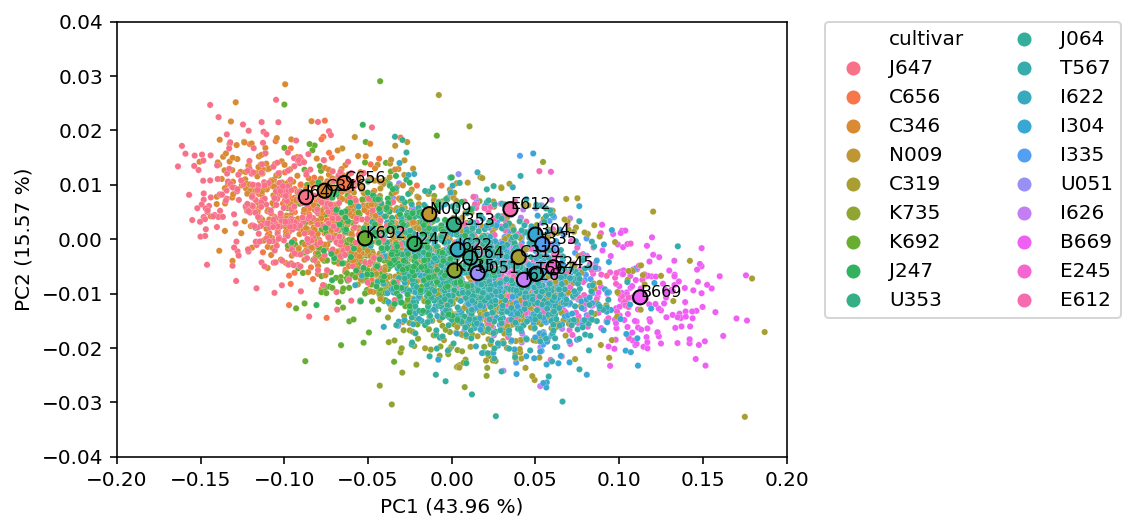

In [19]:
pc = 1
#calculate average of PCA coords
ave_embed2 = embed2.groupby("cultivar").mean()
ave_embed2["cultivar"] = ave_embed2.index


#plot PCA on PC1 and PC2
pc = 1
g = sns.scatterplot(x="PC"+str(pc), y="PC"+str(pc+1),
                data=embed2, hue="cultivar", alpha=1,linewidth=0.1,s=10,hue_order=order)

#plot average
g = sns.scatterplot(x="PC"+str(pc), y="PC"+str(pc+1),
                data=ave_embed2, alpha=1, edgecolor="black", linewidth=1,s=50,hue="cultivar",hue_order=order,legend=None)
#add cultivar name near average
for line in range(0,ave_embed2.shape[0]):
    textpos = [ave_embed2["PC"+str(pc)][line],ave_embed2["PC"+str(pc+1)][line]]
    plt.text(textpos[0], textpos[1],ave_embed2["cultivar"][line],size=8)

# the limits are too wide due to outliers. therefore manually setting it.
plt.xlim([-0.2,0.2])
plt.ylim([-0.04,0.04])
    
#add variance explained to axis
plt.xlabel("PC%s (%s %%)" %
           (str(pc), np.round(pca2.explained_variance_ratio_[pc-1]*100, 2)))
plt.ylabel("PC%s (%s %%)" % (
    str(pc+1), np.round(pca2.explained_variance_ratio_[pc]*100, 2)))
    
    
#add legend
g.legend(loc="upper right",bbox_to_anchor=(1.5,1),ncol=2, borderaxespad=0.)

## Latent Space Interpolation

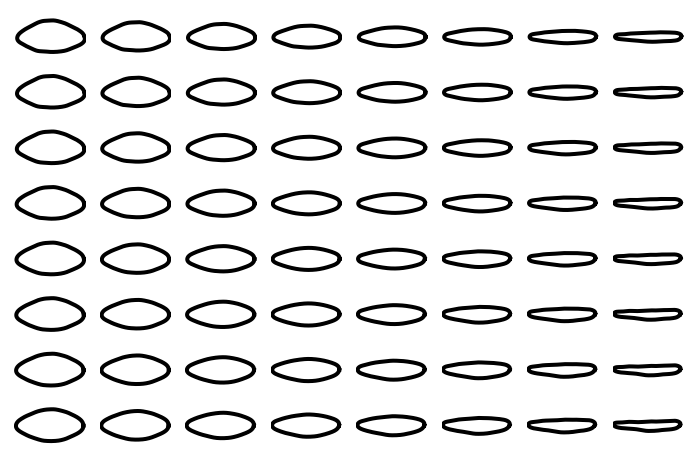

In [20]:
n = 8
grid_y = np.linspace(-0.03, 0.03, n)
grid_x = np.linspace(-0.25, 0.25, n)

k=1
for i, yi in enumerate(grid_y[::-1]):
    for j, xi in enumerate(grid_x):
        plt.subplot(n,n,k)
        plt.axis("off")
        value = get_value(pca2,xi,yi)
        contours = reconstruct_contour(value.reshape(20,4))
        plt.plot(contours[:,0],contours[:,1],color="black",linewidth=2)
        plt.fill_between(contours[:,0],contours[:,1],color="white",alpha=0.5)
        plt.xlim([-1.2,1.2])
        plt.ylim([-1,1])
        k +=1

## Visualize the shape correlated to each PCs

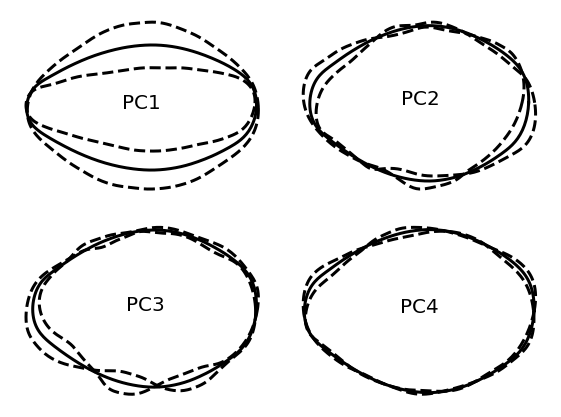

In [21]:
plt.figure(figsize=(4,3))

for i in range(1,5):
    plt.subplot(2,2,i)
    plt.text(-0.2,-0.01,"PC"+str(i))
    plt.axis("off")
    n = i -1
    unit = 2
    efms = pc2efm(pca2, n, unit)
    for i, style in enumerate(["dashed","solid","dashed"]):
        contours = reconstruct_contour(efms[i].reshape(20,4))  #pyefd function
        plt.plot(contours[:,0],contours[:,1],linestyle=style,color="black")

    plt.tight_layout()

# Variational Autoencoder (VAE)

In [25]:
from keras.layers import Dense, Input
from keras.layers import Conv2D, Flatten, Lambda
from keras.layers import Reshape, Conv2DTranspose
from keras.models import Model
from keras.losses import mse, binary_crossentropy
from keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
import keras.backend as K
from scipy.stats import norm

## Load model

In [24]:
K.clear_session()

def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon



batch_size = 1
image_size = 256
kernel_size = 3
filters = 32
latent_dim = 2
input_shape = (image_size, image_size, 3) 


inputs = Input(shape=input_shape, name='encoder_input')
x = inputs
for i in range(4):
    filters *= 2
    x = Conv2D(filters=filters,
               kernel_size=kernel_size,
               activation='relu',
               strides=2,
               padding='same')(x)

shape = K.int_shape(x)
x = Flatten()(x)
x = Dense(16, activation='relu')(x)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')


latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(shape[1] * shape[2] * shape[3], activation='relu')(latent_inputs)
x = Reshape((shape[1], shape[2], shape[3]))(x)
for i in range(4):
    x = Conv2DTranspose(filters=filters,
                        kernel_size=kernel_size,
                        activation='relu',
                        strides=2,
                        padding='same')(x)
    filters //= 2

outputs = Conv2DTranspose(filters=3,
                          kernel_size=kernel_size,
                          activation='sigmoid',
                          padding='same',
                          name='decoder_output')(x)
decoder = Model(latent_inputs, outputs, name='decoder')


outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae') 

vae.compile(optimizer='rmsprop',loss="mse")  #a dummy loss. loss does not mean anything in the inference but needed for compiling.

#encoder.summary()
#decoder.summary()
vae.summary()
vae.load_weights("data/barley/model_weights/VAE.hdf5")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 256, 256, 3)       0         
_________________________________________________________________
encoder (Model)              [(None, 2), (None, 2), (N 3648212   
_________________________________________________________________
decoder (Model)              (None, 256, 256, 3)       4303491   
Total params: 7,951,703
Trainable params: 7,951,703
Non-trainable params: 0
_________________________________________________________________


## Analyze latent vectors extracted from single seed images

In [50]:
df3 = pd.read_csv("data/barley/extracted_phenotypes/VAE_latent.csv",index_col=0)
df3.head()

,cultivar,Z1,Z2
0,B669,0.943451,-2.085684
1,B669,1.172215,-2.771253
2,B669,0.393145,-1.138846
3,B669,0.227332,-0.724245
4,B669,0.707596,-3.538042


In [53]:
#get averages as well
avedf3 = df3.groupby(["cultivar"]).mean()
avedf3= avedf3.rename(columns={0:"Z1",1:"Z2"})
avedf3.head()

,Z1,Z2
cultivar,,
B669,0.381878,-2.789504
C319,-0.269089,1.354281
C346,1.645934,0.431264
C656,1.903708,0.401986
E245,-0.557881,-2.233761


## Visualize Latent Space

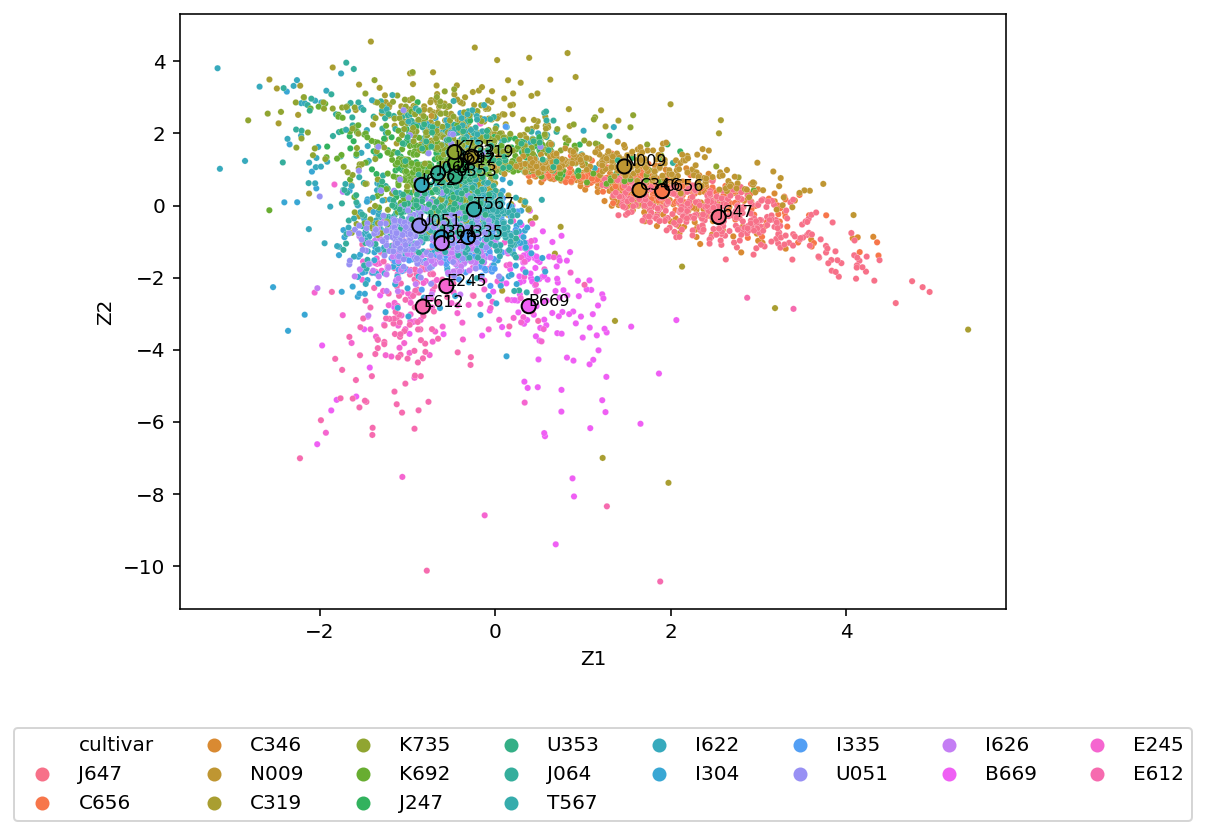

In [100]:
plt.figure(figsize=(8,6))
g = sns.scatterplot(x="Z1",y="Z2",data=df3,hue = "cultivar",linewidth=0.1,alpha=1,s=10,legend=None,hue_order=order)

g = sns.scatterplot(x="Z1", y="Z2",
                data=avedf3, alpha=1, edgecolor="black", linewidth=1,s=50,hue=avedf3.index,hue_order=order)
g.legend(loc="upper left",bbox_to_anchor=(-0.2,-0.2),ncol=8, borderaxespad=0.)

for a, row in avedf3.iterrows():
    plt.text(row["Z1"],row["Z2"],a,size=8)
plt.tight_layout()

## Latent Space Interpolation

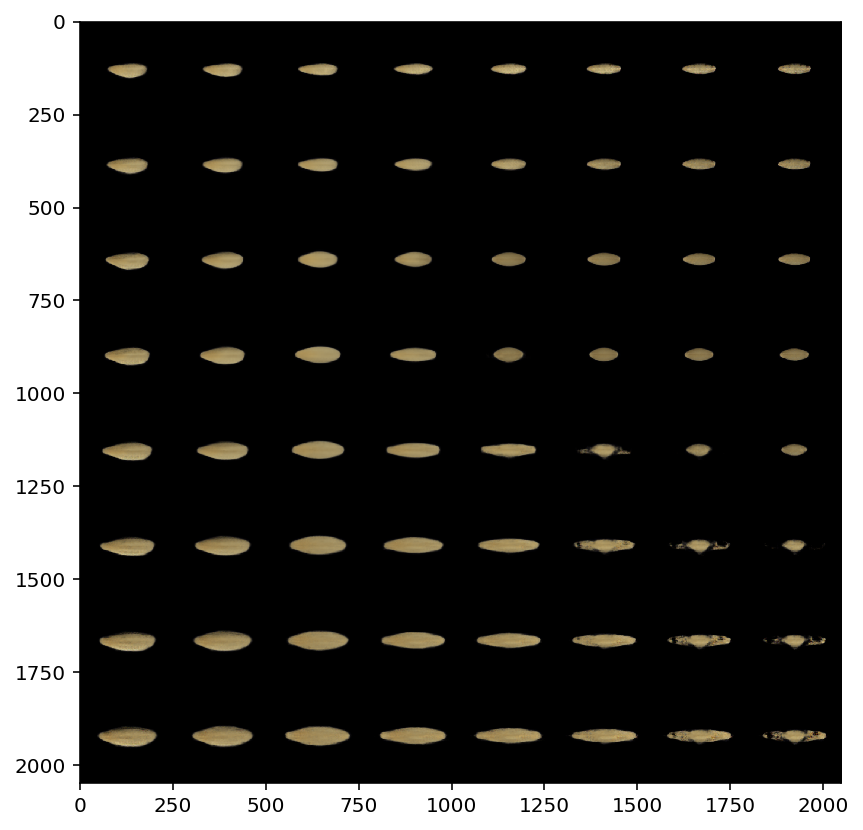

In [104]:
#interpolation
n = 6
input_size = 256

xn = 8
yn = 8
grid_y = np.linspace(-8,5,yn) #これが実質y軸方向!
grid_x = np.linspace(-3,5,xn)

data = np.zeros(((input_size *yn), (input_size * xn), 3))
#grid_x = norm.ppf(np.linspace(0.01, 0.99, n))
#grid_y = norm.ppf(np.linspace(0.01, 0.99, n))

plt.figure(figsize=(8,7))
for i, yi in enumerate(grid_y[::-1]):
    for j, xi in enumerate(grid_x):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        image = x_decoded[0].reshape(input_size, input_size, 3)
        data[i * input_size: (i + 1) * input_size,
             j * input_size: (j + 1) * input_size] = image
plt.imshow(data)

#imsave("PCA_latent.jpg",data)